In [112]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os
import pandas as pd
import matplotlib.patches as patches
from matplotlib import cm

In [58]:
tmp = glob.glob('D:/Data/SGP_VCEIL/*20120610*')
filename = tmp[0]

f = xr.open_dataset(filename)
first_cbh_day = f['first_cbh'].values/1000.
time_tmp = f['time'].values

In [50]:
time_tmp.shape

(5397,)

In [51]:
time_tmp = np.array(time_tmp)
nt = len(time_tmp)
time_day_cbh = np.zeros(nt)

In [53]:
for i in np.arange(nt):
    tmp = str(time_tmp[i])
    tmp0 = tmp.split('T')
    tmp1 = tmp0[1].split(':')
    tmp1 = np.array(tmp1,dtype=float)
    time_day_cbh[i] =tmp1[0] + tmp1[1]/60. + tmp1[2]/3600.

In [52]:
time_tmp.shape

(5397,)

In [5]:
DLfiles = glob.glob('D:/Data/SGP_DL/20120610/*20120610*')
nfile = len(DLfiles)
# nfile = 12

for ifile in np.arange(10, nfile):
    filename = DLfiles[ifile]
    print(filename)
    
    f = xr.open_dataset(filename)
    
    #determine time
    time_tmp = f['time'].values
    time_tmp = np.array(time_tmp)
    nt = len(time_tmp)
    time_day0 = np.zeros(nt)
    for i in np.arange(nt):
        tmp = str(time_tmp[i])
        tmp0 = tmp.split('T')
        tmp1 = tmp0[1].split(':')
        tmp1 = np.array(tmp1,dtype=float)
        time_day0[i] =tmp1[0] + tmp1[1]/60. + tmp1[2]/3600.
    
    if ifile == 10:
        range_plt = f['range'].values/1000.
        ref_day = f['attenuated_backscatter'].values
        W_day = f['radial_velocity'].values
        SNR_day = f['intensity'].values - 1.
        time_day_DL = time_day0
    else:
        time_day_DL = np.concatenate([time_day_DL,time_day0])
        ref_day = np.vstack((ref_day, f['attenuated_backscatter'].values))
        W_day = np.vstack((W_day, f['radial_velocity'].values))
        SNR_day = np.vstack((SNR_day, f['intensity'].values - 1))

D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.090001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.100001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.110002.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.120002.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.130001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.140001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.150001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.160001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.170001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.180002.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.190002.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.200001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.210002.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.220001.custom.cdf
D:/Data/SGP_DL/20120610\sgpdlfptC1.b1.20120610.230001.custom.cdf


In [32]:
W_day[SNR_day <= 0.01] = -999.
W_day = np.ma.masked_where(W_day == -999., W_day)

In [6]:
time_day_DL.shape

(40858,)

In [7]:
W_day.shape

(40858, 320)

In [ ]:
# def selectdata_radar(Array, 
#   HArray, TArray, H0, HE, T0, TE,
#   H_Output = HArray_Output, T_Output = TArray_Output)

#     Index_T = np.where((TArray >= T0) & (TArray <= TE))[0]
#     Count_T = len(Index_T)
    
#     Index_H = np.where((HArray >= H0) & (HArray <= HE))[0]    
#     Count_H = len(Index_H)
    
#     Array_Temp = Array[Index_H[0]:Index_H[count_H-1],Index_T[0]:Index_T[Count_T-1]]

#     HArray_Output = HArray[Index_H[0]:Index_H[count_H-1]]
    
#     Array_DeltaT = np.diff(TArray)

#     DeltaT = np.mean(Array_deltaT[Array_deltaT > 0])
    
#     NT = round((TE - T0)/DeltaT)
    
#     TArray_Output = np.linspace(T0, TE, NT)
    
#     Array_Output = np.zeros(Count_H,NT)
        
#     for it in np.arange(Count_T): 
#         v = TArray[i]
        
#         idx = (np.abs(TArray_Output - v)).argmin()

In [24]:
def idengap_radar(Array, TArray):

    Array_DeltaT = np.diff(TArray)
    DeltaT = np.mean(Array_DeltaT[Array_DeltaT > 0])
    
    indgap = np.where(Array_DeltaT > 2.*DeltaT)[0]
    
    ngap = len(indgap)
    
    for i in np.arange(ngap):
        Array[indgap[i]:indgap[i] + 1, :] = -999.
    
    Array_ = np.ma.masked_where(Array == -999., Array)
    
    return Array_

In [92]:
Myxrange = [18.5, 21.5]
Myyrange = [0.2, 2.5]

In [69]:
Myxrange = [10.5, 21.5]

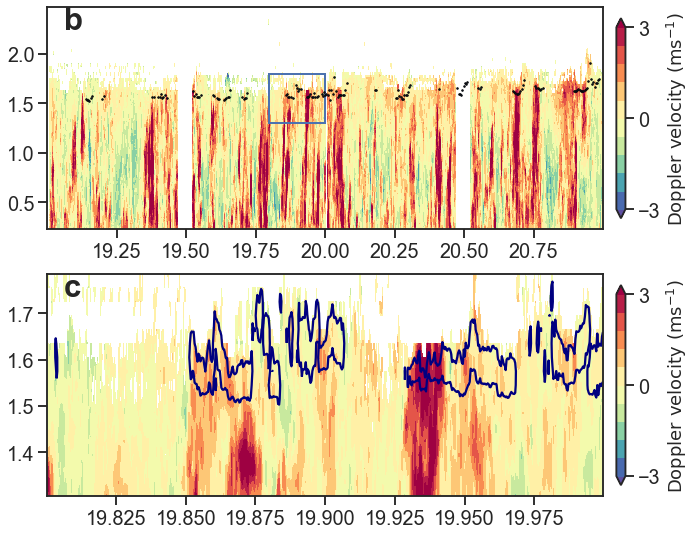

In [118]:
sns.set(context="talk", style="ticks", font_scale=1.2)
myfontsize = 18

fig, axs = plt.subplots(2,1,figsize=[12, 9])

#large window
Myxrange = [19, 21.]
Myyrange = [0.2, 2.5]

indt = np.where((time_day_DL > Myxrange[0]) &(time_day_DL < Myxrange[1]))[0]
indz = np.where((range_plt > Myyrange[0]) &(range_plt < Myyrange[1]))[0]

T_plot = time_day_DL[indt]
z_plot = range_plt[indz]
w_plot0 = W_day[indt[0]:indt[len(indt) - 1] + 1, indz[0]:indz[len(indz) - 1] + 1]
w_plot = idengap_radar(w_plot0, T_plot)

oax = axs[0].contourf(T_plot,z_plot,w_plot.T, cmap = cm.Spectral_r, levels=np.linspace(-3, 3, 11), extend = 'both')
cbar = fig.colorbar(oax, ax=axs[0], orientation='vertical', ticks = [-3, 0, 3], shrink=0.9, pad=0.02)
cbar.set_label(r"$\mathrm{Doppler \ velocity \ (ms^{-1})}$", fontsize=myfontsize)

ind = np.where((time_day_cbh > Myxrange[0]) &(time_day_cbh < Myxrange[1]))[0]
axs[0].plot(time_day_cbh[ind], first_cbh_day[ind], ls = '', marker = '.', markersize=3, mec = 'black')

# zoom-in window
Myxrange0 = [19.8, 20.]
Myyrange0 = [1.3, 1.8]

axs[0].add_patch(patches.Rectangle((Myxrange0[0],Myyrange0[0]),Myxrange0[1]-Myxrange0[0],Myyrange0[1]-Myyrange0[0],
                                linewidth=2,edgecolor='b',facecolor='none'))

indt = np.where((time_day_DL > Myxrange0[0]) &(time_day_DL < Myxrange0[1]))[0]
indz = np.where((range_plt > Myyrange0[0]) &(range_plt < Myyrange0[1]))[0]

T_plot = time_day_DL[indt]
z_plot = range_plt[indz]
w_plot0 = W_day[indt[0]:indt[len(indt) - 1] + 1, indz[0]:indz[len(indz) - 1] + 1]
w_plot = idengap_radar(w_plot0, T_plot)

ref_plot0 = ref_day[indt[0]:indt[len(indt) - 1] + 1, indz[0]:indz[len(indz) - 1] + 1]
ref_plot = idengap_radar(ref_plot0, T_plot)

oax = axs[1].contourf(T_plot,z_plot,w_plot.T, cmap = cm.Spectral_r, levels=np.linspace(-3, 3, 11), extend = 'both')
cbar = fig.colorbar(oax, ax=axs[1], orientation='vertical', ticks = [-3, 0, 3], shrink=0.9, pad=0.02)
cbar.set_label(r"$\mathrm{Doppler \ velocity \ (ms^{-1})}$", fontsize=myfontsize)

oax = axs[1].contour(T_plot,z_plot,ref_plot.T, levels=[np.power(10, -4.6)], colors = 'navy')

# ind = np.where((time_day_cbh > Myxrange0[0]) &(time_day_cbh < Myxrange0[1]))[0]
# axs[1].plot(time_day_cbh[ind], first_cbh_day[ind], ls = '', marker = '.', markersize=10, mfc = 'black', mec = 'black')

for i, label in enumerate(('b', 'c')):
    axs[i].text(0.03, 0.9, label, transform=axs[i].transAxes,fontsize=31, fontweight='bold')

In [93]:
T_plot.shape

(5476,)

In [94]:
w_plot.shape

(5475, 82)

In [95]:
indt[0]

array([25920, 25921, 25922, ..., 31393, 31394, 31395], dtype=int64)

In [96]:
len(indt[0])

5476

In [108]:
indt[0][len(indt[0])]

IndexError: index 5476 is out of bounds for axis 0 with size 5476

In [114]:
indt0 = indt[0]
indt0[1:len(indt0)]

array([25921, 25922, 25923, ..., 31393, 31394, 31395], dtype=int64)

In [99]:
indt[0][len(indt[0]) - 1]

31395

In [112]:
a = np.zeros(5)
print(a[1:len(a)])
print(a[len(a)])

[0. 0. 0. 0.]


IndexError: index 5 is out of bounds for axis 0 with size 5